In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
## Reading the data from CSV file.
data = pd.read_csv('input_data.csv')
data

,X1,X2,X3,X4,X5,Y
0,14.47200,23.5520,67.921,76.212,88.292,1583.2
1,8.77720,23.4560,45.202,74.720,95.002,1367.7
2,13.00300,17.8300,67.540,64.430,114.630,1655.2
3,-6.35780,30.4270,46.573,93.653,67.497,1239.7
4,25.58100,7.4073,30.896,72.519,98.709,2010.4
...,...,...,...,...,...,...
295,9.24530,10.1590,80.555,72.726,99.786,1503.8
296,0.38753,44.1610,80.662,72.227,115.950,1639.8
297,11.52900,-12.7620,57.399,71.702,116.500,1524.2
298,-4.37280,18.8140,65.591,99.102,118.160,1699.5


In [3]:
## Separating data for independent and dependent variable.
x1 = data['X1'].to_numpy()
x2 = data['X2'].to_numpy()
x3 = data['X3'].to_numpy()
x4 = data['X4'].to_numpy()
x5 = data['X5'].to_numpy()
y = data['Y'].to_numpy() 

(6.033567975333334, 148.51399372523088)

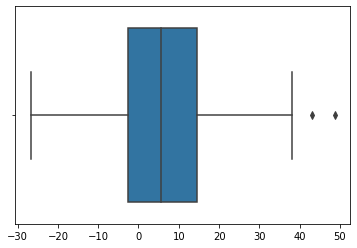

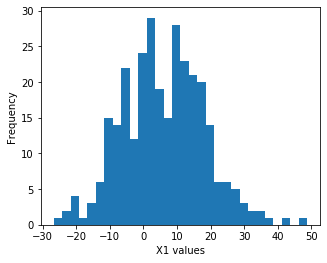

In [4]:
## Calculating mean, variance, histogram, box-plot for X1.
n_bins = 30
sns.boxplot(x1)
x1_mean = np.mean(x1)
x1_var = np.var(x1)
fig, ax = plt.subplots(figsize =(5, 4)) 
ax.hist(x1, bins = n_bins)
plt.xlabel("X1 values") 
plt.ylabel("Frequency")
x1_mean, x1_var

(26.919584733333334, 151.17199258958894)

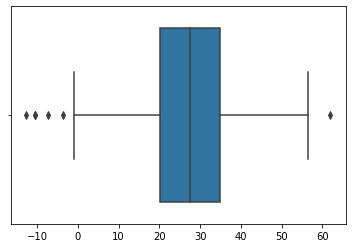

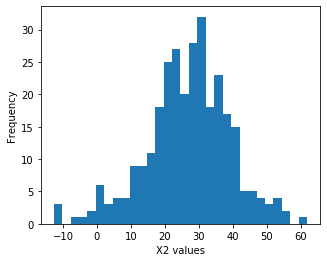

In [5]:
## Calculating mean, variance, histogram, box-plot for X2.
n_bins = 30
sns.boxplot(x2)
x2_mean = np.mean(x2)
x2_var = np.var(x2)
fig, ax = plt.subplots(figsize =(5,4)) 
ax.hist(x2, bins = n_bins)
plt.xlabel("X2 values") 
plt.ylabel("Frequency")
x2_mean, x2_var

(60.4127, 167.09651360333334)

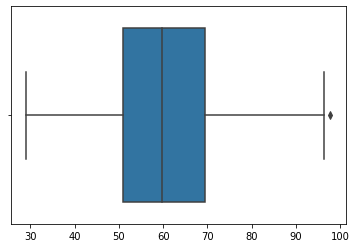

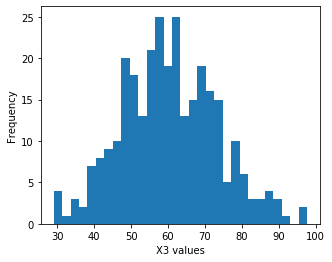

In [6]:
## Calculating mean, variance, histogram, box-plot for X3.
n_bins = 30
sns.boxplot(x3)
x3_mean = np.mean(x3)
x3_var = np.var(x3)
fig, ax = plt.subplots(figsize =(5,4)) 
ax.hist(x3, bins = n_bins)
plt.xlabel("X3 values") 
plt.ylabel("Frequency")
x3_mean, x3_var

(80.02675333333333, 142.09622641915556)

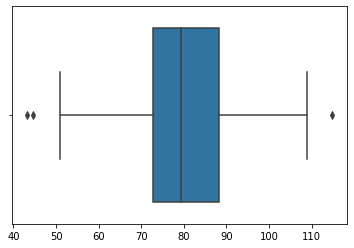

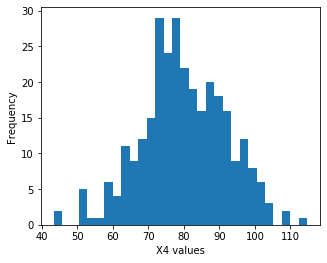

In [7]:
## Calculating mean, variance, histogram, box-plot for X4.
n_bins = 30
sns.boxplot(x4)
x4_mean = np.mean(x4)
x4_var = np.var(x4)
fig, ax = plt.subplots(figsize =(5, 4)) 
ax.hist(x4, bins = n_bins)
plt.xlabel("X4 values") 
plt.ylabel("Frequency")
x4_mean, x4_var

(98.92907666666667, 157.46047649745557)

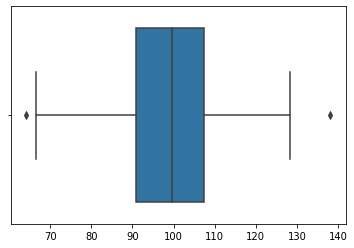

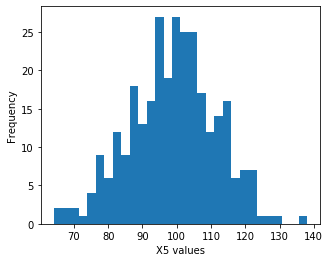

In [8]:
## Calculating mean, variance, histogram, box-plot for X5.
n_bins = 30
sns.boxplot(x5)
x5_mean = np.mean(x5)
x5_var = np.var(x5)
fig, ax = plt.subplots(figsize =(5, 4)) 
ax.hist(x5, bins = n_bins)
plt.xlabel("X5 values") 
plt.ylabel("Frequency")
x5_mean, x5_var

In [9]:
corr_matrix = data.corr()
corr_matrix

,X1,X2,X3,X4,X5,Y
X1,1.000000,0.022148,-0.026745,0.039889,0.002104,0.568159
X2,0.022148,1.000000,-0.016273,0.108075,-0.064093,0.241326
X3,-0.026745,-0.016273,1.000000,-0.037981,-0.022852,0.139072
X4,0.039889,0.108075,-0.037981,1.000000,0.004115,0.264501
X5,0.002104,-0.064093,-0.022852,0.004115,1.000000,0.233390
Y,0.568159,0.241326,0.139072,0.264501,0.233390,1.000000


Task 1 comments:
I have calculate the mean, variance, box plots for each of the independent variable X1, X2, X3, X4, X5 and also calculate the histogram for each of the variable with bin size of 30. The box plot is used to find out the outliers present in individual independent variable. As shown in above correlation matrix the correlation value for each of individual variable including the dependent variable is calculate. From the correlation matrix we can clearly see that all the independent variables are uncorrelated with each other. While all the the independent variables are correlated to the dependent variabl Y with some value with X1 having highest correlation with Y.

In [10]:
## Getting X1, Y for linear regression
data_task2 = data[['X1','Y']]
data_task2

,X1,Y
0,14.47200,1583.2
1,8.77720,1367.7
2,13.00300,1655.2
3,-6.35780,1239.7
4,25.58100,2010.4
...,...,...
295,9.24530,1503.8
296,0.38753,1639.8
297,11.52900,1524.2
298,-4.37280,1699.5


In [11]:
## Removing outliers by calculating z-score for the data fitting linear regression model showing model summary.
z = np.abs(stats.zscore(data_task2))
data_task2 = data_task2[(z<3).all(axis=1)]
x1, y = data_task2['X1'].to_numpy(), data_task2['Y'].to_numpy()
x = sm.add_constant(x1)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     74.89
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           3.41e-16
Time:                        18:31:40   Log-Likelihood:                -2046.7
No. Observations:                 294   AIC:                             4097.
Df Residuals:                     292   BIC:                             4105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1544.9989     16.533     93.449      0.000    1512.460    1577.538
x1            11.4074      1.318      8.654      0.000       8.813      14.002
==============================================================================
Omnibus:                       61.379   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.031
Skew:                           1.126   Prob(JB):                     7.76e-25
Kurtosis:                       4.998   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Y')

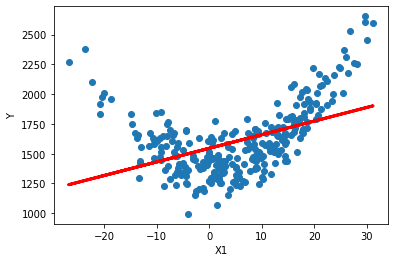

In [12]:
## Scatter plot for the predicted values and X1.
plt.scatter(x1,y)
plt.plot(x1, y_pred, color = 'red', linewidth = 3 )
plt.xlabel('X1')
plt.ylabel('Y')

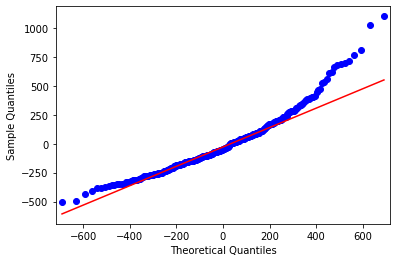

In [13]:
## Plotting QQ plot for residuals.
error = np.subtract(y, y_pred)
error_var = np.var(error)
fig = sm.qqplot(error, loc = 0, scale = np.sqrt(error_var), line='q')
plt.show()

Text(0, 0.5, 'Frequency')

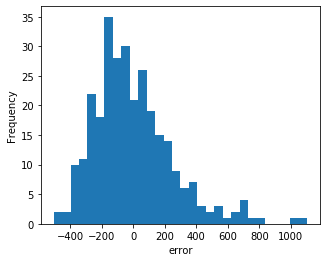

In [14]:
## Plotting histogram of residuals.
n_bins = 30
fig, ax = plt.subplots(figsize =(5, 4)) 
ax.hist(error, bins = n_bins)
plt.xlabel("error") 
plt.ylabel("Frequency")

Chi squared test doesnt satisfy hypothesis not accepted


Text(0, 0.5, 'residuals')

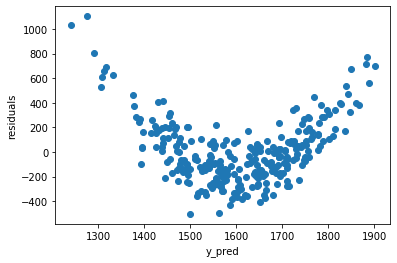

In [15]:
## Chi-squared test hypothesis.
k2, prob = stats.normaltest(error)
if prob < 0.05:
    print("Chi squared test doesnt satisfy hypothesis not accepted")
else:
    print('Chi squared test passed hypothesis accepted')
    
plt.scatter(y_pred, error)
plt.xlabel('y_pred')
plt.ylabel('residuals')

In [16]:
## Implementation for polynomial regression using X1.
data_task2 = data[['X1','Y']]
z = np.abs(stats.zscore(data_task2))
data_task2 = data_task2[(z<3).all(axis=1)]
data_task2['X1^2'] = data_task2['X1'] ** 2
x1, y = data_task2[['X1', 'X1^2']], data_task2['Y'].to_numpy()
x = sm.add_constant(x1)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     452.5
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           4.83e-90
Time:                        18:31:47   Log-Likelihood:                -1872.5
No. Observations:                 294   AIC:                             3751.
Df Residuals:                     291   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1402.1781     10.710    130.919      0.000    1381.099    1423.257
X1            -0.5828      0.866     -0.673      0.502      -2.288       1.122
X1^2           1.3168      0.051     25.708      0.000       1.216       1.418
==============================================================================
Omnibus:                        0.776   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.869
Skew:                           0.115   Prob(JB):                        0.647
Kurtosis:                       2.867   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Y')

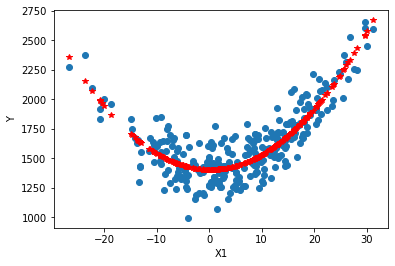

In [17]:
## Scatter plot for the predicted values and X1.
plt.scatter(x1['X1'],y)
plt.plot(x1['X1'], y_pred, 'r*', linewidth = 3 )
plt.xlabel('X1')
plt.ylabel('Y')

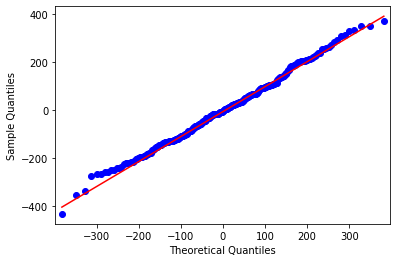

In [18]:
## Plotting QQ plot for residuals.
error = np.subtract(y, y_pred)
error_var = np.var(error)
fig = sm.qqplot(error, loc = 0, scale = np.sqrt(error_var), line='q')
plt.show()

Text(0, 0.5, 'Frequency')

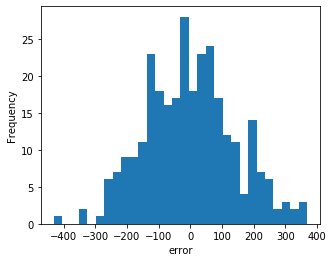

In [19]:
## Plotting histogram for residuals.
n_bins = 30
fig, ax = plt.subplots(figsize =(5, 4)) 
ax.hist(error, bins = n_bins)
plt.xlabel("error") 
plt.ylabel("Frequency")

Chi squared test passed hypothesis accepted with prob =  0.6783260030766237


Text(0, 0.5, 'residuals')

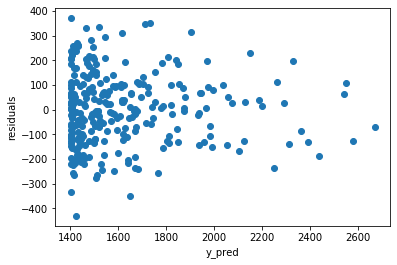

In [20]:
## Chi-squared test hypothesis.
k2, prob = stats.normaltest(error)
if prob < 0.05:
    print("Chi squared test doesnt satisfy hypothesis not accepted with prob = ", prob)
else:
    print('Chi squared test passed hypothesis accepted with prob = ', prob)
    
plt.scatter(y_pred, error)
plt.xlabel('y_pred')
plt.ylabel('residuals')

Task 2 comments 
To remove the ouliers from the data i have used zscore for every data point and removed the data points which are 3standar deviation apart from the mean value. For this task I have only considered the independent variable X1. first we have used simply linear regression with Y = a0 + a1X1 + e. For the linear regression i have used statsmodel as it gives easy summary and the parameters for the model. For the linear regression we can see from the regreesion line that it is just a line which deivide the data and from the r^2 value which is 0.165 which is very low shows that this model doesnt noot fit the data very well. Also from the residual analysis we can see that QQ plot is signifcantly close to the line but the histogram for residuals with bin size of 30 shows it is similar to normal distribution but not exactly the nomal distribution. And from scatter plot for residuals we can see that the residuals are uncorrelated as there are no trends in between them. 
Now when we used the polynomial regression with independent variable X1. Y = a0 + a1X1 + a2X1^2 + e. From the model summary and the regression line plot we can clearly see that the model fits the data very well. Also the R^2 value which is 0.75 which is much improved that the linear regression. The QQ plot also matches the line for Normal distribution and the Chi-squared test hypothesis is also expceted. From the histogram of residuals we can see that the do follow normal distribution and the scatter plot do not show any kind of correlation od trend between them.

In [21]:
## Getting X1, X2, X3, X4, X5, Y for linear regression.
data_task3 = data[['X1','X2','X3','X4','X5','Y']]
data_task3

,X1,X2,X3,X4,X5,Y
0,14.47200,23.5520,67.921,76.212,88.292,1583.2
1,8.77720,23.4560,45.202,74.720,95.002,1367.7
2,13.00300,17.8300,67.540,64.430,114.630,1655.2
3,-6.35780,30.4270,46.573,93.653,67.497,1239.7
4,25.58100,7.4073,30.896,72.519,98.709,2010.4
...,...,...,...,...,...,...
295,9.24530,10.1590,80.555,72.726,99.786,1503.8
296,0.38753,44.1610,80.662,72.227,115.950,1639.8
297,11.52900,-12.7620,57.399,71.702,116.500,1524.2
298,-4.37280,18.8140,65.591,99.102,118.160,1699.5


In [22]:
## Implementation for linear regression using X1, X2, X3, X4, X5.
z = np.abs(stats.zscore(data_task3))
data_task3 = data_task3[(z<3).all(axis=1)]
x1, y = data_task3[['X1','X2','X3','X4','X5']], data_task3['Y'].to_numpy()
x = sm.add_constant(x1)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     52.88
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.24e-38
Time:                        18:32:03   Log-Likelihood:                -1950.7
No. Observations:                 289   AIC:                             3913.
Df Residuals:                     283   BIC:                             3935.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -193.5905    145.594     -1.330      0.185    -480.175      92.994
X1            11.6203      1.081     10.749      0.000       9.492      13.748
X2             5.0868      1.057      4.813      0.000       3.007       7.167
X3             4.2968      0.942      4.559      0.000       2.442       6.152
X4             6.8171      1.044      6.527      0.000       4.761       8.873
X5             8.0684      0.986      8.184      0.000       6.128      10.009
==============================================================================
Omnibus:                      133.475   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.828
Skew:                           2.061   Prob(JB):                    7.81e-104
Kurtosis:                       7.737   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

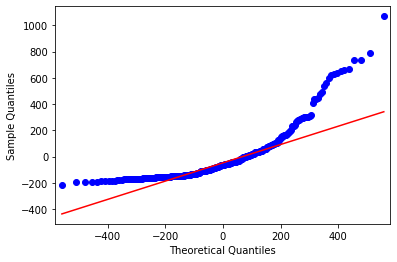

In [23]:
## Plotting QQ plot for residuals.
error = np.subtract(y, y_pred)
error_var = np.var(error)
fig = sm.qqplot(error, loc = 0, scale = np.sqrt(error_var), line='q')
plt.show()

Text(0, 0.5, 'Frequency')

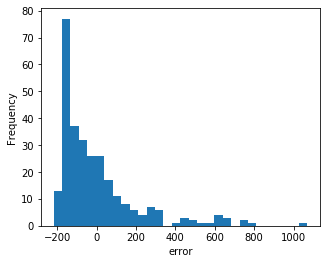

In [24]:
## Plotting histogram for residuals.
n_bins = 30
fig, ax = plt.subplots(figsize =(5, 4)) 
ax.hist(error, bins = n_bins)
plt.xlabel("error") 
plt.ylabel("Frequency")

In [25]:
## Getting X1, X2, X4, Y for linear regression.
final_data = data_task3 = data[['X1','X2','X4','Y']]
final_data

,X1,X2,X4,Y
0,14.47200,23.5520,76.212,1583.2
1,8.77720,23.4560,74.720,1367.7
2,13.00300,17.8300,64.430,1655.2
3,-6.35780,30.4270,93.653,1239.7
4,25.58100,7.4073,72.519,2010.4
...,...,...,...,...
295,9.24530,10.1590,72.726,1503.8
296,0.38753,44.1610,72.227,1639.8
297,11.52900,-12.7620,71.702,1524.2
298,-4.37280,18.8140,99.102,1699.5


In [26]:
## Implementation for linear regression using X1, X2, X4.
z = np.abs(stats.zscore(data_task3))
data_task3 = data_task3[(z<3).all(axis=1)]
x1, y = data_task3[['X1','X2','X4']], data_task3['Y'].to_numpy()
x = sm.add_constant(x1)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     46.10
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.48e-24
Time:                        18:32:06   Log-Likelihood:                -1995.6
No. Observations:                 290   AIC:                             3999.
Df Residuals:                     286   BIC:                             4014.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        883.4184     98.816      8.940      0.000     688.920    1077.917
X1            11.3510      1.227      9.255      0.000       8.937      13.765
X2             4.7545      1.199      3.964      0.000       2.394       7.115
X4             6.6832      1.183      5.647      0.000       4.354       9.013
==============================================================================
Omnibus:                       63.850   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.892
Skew:                           1.182   Prob(JB):                     6.83e-26
Kurtosis:                       5.000   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

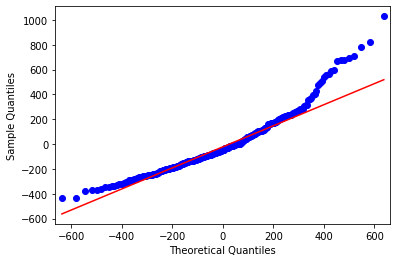

In [27]:
## Plotting QQ plot for residuals.
error = np.subtract(y, y_pred)
error_var = np.var(error)
fig = sm.qqplot(error, loc = 0, scale = np.sqrt(error_var), line='q')
plt.show()

Text(0, 0.5, 'Frequency')

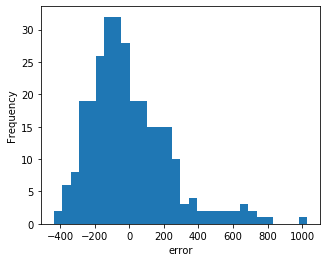

In [28]:
## Plotting histogram for residuals.
n_bins = 30
fig, ax = plt.subplots(figsize =(5, 4)) 
ax.hist(error, bins = n_bins)
plt.xlabel("error") 
plt.ylabel("Frequency")

Chi squared test doesnt satisfy hypothesis not accepted with prob =  1.3653877537569556e-14


Text(0, 0.5, 'residuals')

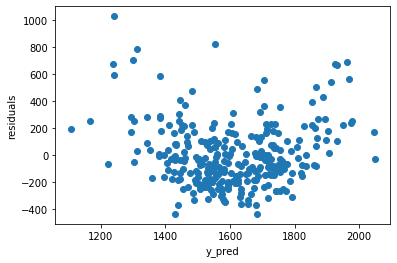

In [29]:
## Chi-squared test hypothesis.
k2, prob = stats.normaltest(error)
if prob < 0.05:
    print("Chi squared test doesnt satisfy hypothesis not accepted with prob = ", prob)
else:
    print('Chi squared test passed hypothesis accepted with prob = ', prob)
    
plt.scatter(y_pred, error)
plt.xlabel('y_pred')
plt.ylabel('residuals')

Task 3 comments 
To remove the ouliers from the data I have used zscore for every data point and removed the data points which are 3 standard deviation apart from the mean value. For this task I have all considered the independent variable X1, X2, X3, X4, X5. First we have used simply linear regression with Y = a0 + a1X1 + a2X2 + a3X3 + a4X4 + a5X5 + e. From the r^2 value which is 0.28 which is very low shows that this model doesnt not fit the data very well. Also gives us an errort that there might be multicolinearity in the data. Also from the residual analysis we can see that QQ plot is no where close to the line and the histogram for residuals with bin size of 30 shows it is one sided and not normally distributed.  
From the correlation matrix of the we can see that the independent variable X1 is more correlated to the dependent Y as compared to the other independent variables. But we if only use the X1 it will result in the same model as we have used in task 2. Therefore I have used the variables X1, X2, X4 which are top 3 indepndent variables to which Y is correlated. The 3 variables are chosen after trying out multiple variations in the number of variables. But from the QQ plot, histogram and p, R^2 values we can see that this model is better than the linear regression model but it does not match the performance for a polynomial regression model. 